<a href="https://colab.research.google.com/github/Brieatieno/Introduction-to-github/blob/main/PROJECT_1_LUX_TECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EDA on IT Salary Survey for EU region(2018-2020)**

### **CONTEXT**
An anonymous salary survey has been conducted annually since 2015 among European IT specialists with a stronger focus on Germany. This year 1238 respondents volunteered to participate in the survey. The data has been made publicly available by the authors.
The dataset contains rich information about the salary patterns among the IT professionals in the EU region and offers some great insights.

### **DOWNLOAD DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from collections import defaultdict
from wordcloud import WordCloud
from scipy.stats import iqr

## **Load Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IT Salary Survey EU  2020.csv to IT Salary Survey EU  2020.csv


In [ ]:
import pandas as pd
survey_2020= pd.read_csv("IT Salary Survey EU  2020.csv", delimiter=',')
df=pd.DataFrame(dataframe)
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [ ]:
df.shape

(1253, 23)

In [ ]:
df.info()

In [ ]:
df.describe()

## **Cleaning the survey_2020 data**

In [ ]:
survey_2020.columns

In [ ]:
## Renaming Columns
survey_2020.columns = ["Year", "Age", "Gender","City","Position","Years of experience","Germany Experience","Seniority level","Tech program language",
                       "Other Language","Yearly salary","Yearly bonus and stocks", "Salary one year ago","Bonus and stocks last year","Vacation days",
                       "Employment_status","Сontract_duration","Language","Company size","Company type","Job loss COVID","Kurzarbeit","Monetary Support"]

survey_2020.columns = survey_2020.columns.str.replace(' ', '_')

In [ ]:
## Deleting unneeded columns 
del survey_2020['Germany_Experience']
del survey_2020['Other_Language']
del survey_2020['Employment_status']
del survey_2020['Сontract_duration']

In [ ]:
survey_2020.shape

In [ ]:
survey_2020.isna().sum()

Year                            0
Age                            27
Gender                         10
City                            0
Position                        6
Years_of_experience            16
Seniority_level                12
Tech_program_language         127
Yearly_salary                   0
Yearly_bonus_and_stocks       424
Salary_one_year_ago           368
Bonus_and_stocks_last_year    639
Vacation_days                  68
Language                       16
Company_size                   18
Company_type                   25
Job_loss_COVID                 20
Kurzarbeit                    880
Monetary_Support              791
dtype: int64

In [ ]:
## Droping missing and duplicate values 
survey_2020=survey_2020.dropna(subset=['Age','Gender','Position','Years_of_experience','Seniority_level','Salary_one_year_ago','Language']) 
survey_2020=survey_2020.drop_duplicates()

In [ ]:
survey_2020.isna().sum()

In [ ]:
## Changing datetime to date 
survey_2020['Year'] = pd.to_datetime(survey_2020['Year']).dt.year

In [ ]:
## Filtering only data from 2020
survey_2020_filtered=survey_2020[survey_2020['Year']==2020]

In [ ]:
## Cleaning city column
survey_2020_filtered=survey_2020_filtered.replace({'City': {'ü': 'u', 'ö': 'o','ń':'n'}}, regex=True)
survey_2020_filtered['City'] = survey_2020_filtered['City'].str.title().str.strip()

survey_2020_filtered=survey_2020_filtered.replace({'City': {'Nurnberg': 'Nuremberg','Kiev': 'Kyiv','Koln':'Cologne','Den Haag':'The Haag',
                                                            'Cracovia':'Krakow','Bolingen':'Bollingen','Braunschweig':'Brunswick',
                                                            'Sevilla':'Seville','Saint-Petersburg':'Saint Petersburg','Dusseldurf':'Dusseldorf'}})

In [ ]:
## Cleaning poitison column 
survey_2020_filtered['Position'] = survey_2020_filtered['Position'].str.title().str.strip()

counts_2020=survey_2020_filtered.Position.value_counts()
cutoff1=3
cutoff1_keep= list(counts_2020[counts_2020.values>=cutoff1].index)
survey_2020_filtered['Position'] = survey_2020_filtered['Position'].where(survey_2020_filtered['Position'].isin(cutoff1_keep), 'Other')

In [ ]:
survey_2020_filtered.dtypes

Year                            int64
Age                           float64
Gender                         object
City                           object
Position                       object
Years_of_experience            object
Seniority_level                object
Tech_program_language          object
Yearly_salary                 float64
Yearly_bonus_and_stocks        object
Salary_one_year_ago           float64
Bonus_and_stocks_last_year     object
Vacation_days                  object
Language                       object
Company_size                   object
Company_type                   object
Job_loss_COVID                 object
Kurzarbeit                    float64
Monetary_Support               object
dtype: object

In [ ]:
## Cleaning Years of Experience 
survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].astype(str)

survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].str.replace(r',', '.',regex=True)
survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].str.replace(r'6 \(not as a data scientist. but as a lab scientist\)',
                                                                                                    '6',regex=True)
survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].str.replace(r'15\. thereof 8 as CTO','15',regex=True)
survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].str.replace(r'1 \(as QA Engineer\) / 11 in total','11',regex=True)
survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].str.replace(r'less than year','1',regex=True)         

survey_2020_filtered['Years_of_experience'] = pd.to_numeric(survey_2020_filtered['Years_of_experience'])

In [ ]:
## Cleaning Seniority Level
survey_2020_filtered['Seniority_level'] = survey_2020_filtered['Seniority_level'].str.title().str.strip()
survey_2020_filtered=survey_2020_filtered.replace({'Seniority_level': {'Lead': 'Senior','Head': 'Senior','Principal':'Senior','Student':'Junior',
                                                                       'Intern':'Junior','Working Student':'Junior','C-Level':'Senior',
                                                                       'No Idea, There Are No Ranges In The Firm':'Na','Director':'Senior',
                                                                       'C-Level Executive Manager':'Senior','Key': 'Na','No Level':'Na','Cto':'Senior',
                                                                       'Work Center Manager':'Senior','Manager':'Senior','Vp':'Senior','Entry Level':'Junior'}})

In [ ]:
## Cleaning Tech language
survey_2020_filtered['Tech_program_language'] = survey_2020_filtered['Tech_program_language'].str.title().str.strip()

In [ ]:
## Cleaning Vacation Days 
survey_2020_filtered['Vacation_days'] = survey_2020_filtered['Vacation_days'].str.title().str.strip()
survey_2020_filtered=survey_2020_filtered.replace({'Vacation_days': {'23+': '23','24 Labour Days': '24','~25':'25',
                                                                     '30 In Contract (But Theoretically Unlimited)':'365',
                                                                     'Unlimited':'365','(No Idea)':'Na'}})

In [ ]:
## Cleaning Language column
survey_2020_filtered['Language'] = survey_2020_filtered['Language'].str.replace('Deutsch', 'German')
survey_2020_filtered=survey_2020_filtered.replace({'Language': {'English and German': 'Multiple', 'Русский': 'Russian','50/50':'Multiple',
                                                                'Deuglisch':'German','both':'Multiple','Russian, English':'Multiple'}})

In [ ]:
## Cleaning COVID column 
survey_2020_filtered=survey_2020_filtered.replace({'Job_loss_COVID': {'i didn\'t but will be looking for new one because of covid': 'No',
                                                                      'kurzarbeitzeit for 1.5 months': 'No',
                                                                      'Lost the job but for different reason':'No',
                                                                      'yes but found a new one with better pay / perks':'Yes',
                                                                      'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months':'No',
                                                                      'Leads and project inquiries have slowed down':'No','Have been a freelancer at the beginning of year':'Yes',
                                                                       'Laid off for a bit':'Laid Off'}})

In [ ]:
## Cleaning monetary support 
survey_2020_filtered['Monetary_Support'] = survey_2020_filtered['Monetary_Support'].str.title().str.strip()

Monetary_2020=survey_2020_filtered.Monetary_Support.value_counts()
cutoff2=3
cutoff2_keep= list(Monetary_2020[Monetary_2020.values>=cutoff2].index)
survey_2020_filtered['Monetary_Support'] = survey_2020_filtered['Monetary_Support'].where(survey_2020_filtered['Monetary_Support'].isin(cutoff2_keep), 'Other')

In [ ]:
survey_2020_filtered.shape

(833, 19)

In [ ]:
survey_2020_filtered.describe().round()

,Year,Age,Years_of_experience,Yearly_salary,Salary_one_year_ago,Kurzarbeit
count,833.0,833.0,833.0,833.0,833.0,275.0
mean,2020.0,33.0,9.0,673647.0,667160.0,13.0
std,0.0,5.0,5.0,17321462.0,17321681.0,16.0
min,2020.0,22.0,0.0,12000.0,11000.0,0.0
25%,2020.0,29.0,5.0,60000.0,55000.0,0.0
50%,2020.0,32.0,9.0,70000.0,65000.0,0.0
75%,2020.0,36.0,12.0,81000.0,75000.0,30.0
max,2020.0,66.0,40.0,500000000.0,500000000.0,40.0


## **2020 Survey Analysis**

### **Distribution Of Ages**

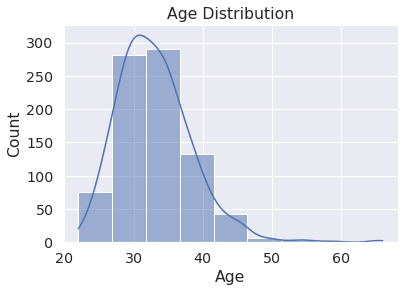

Age Descriptive Statistics


count    833.0
mean      33.0
std        5.0
min       22.0
25%       29.0
50%       32.0
75%       36.0
max       66.0
Name: Age, dtype: float64

In [ ]:
sns.set(font_scale=1.3)
plot=sns.histplot(survey_2020_filtered.Age,bins=9,kde=True)
plt.title('Age Distribution')
plt.show()

print('Age Descriptive Statistics')
survey_2020_filtered['Age'].describe().round()


## **Position Breakdown**

In [ ]:
position=survey_2020_filtered.Position.value_counts().reset_index().iloc[:11]
position=position.rename(columns={"index": "Position", "Position": "Count"})
position.drop([2], axis=0, inplace=True)

top10=[]
for x in position['Position']:
     if x not in top10:
        top10.append(x)
        
rslt_df = survey_2020_filtered[survey_2020_filtered['Position'].isin(top10)] 

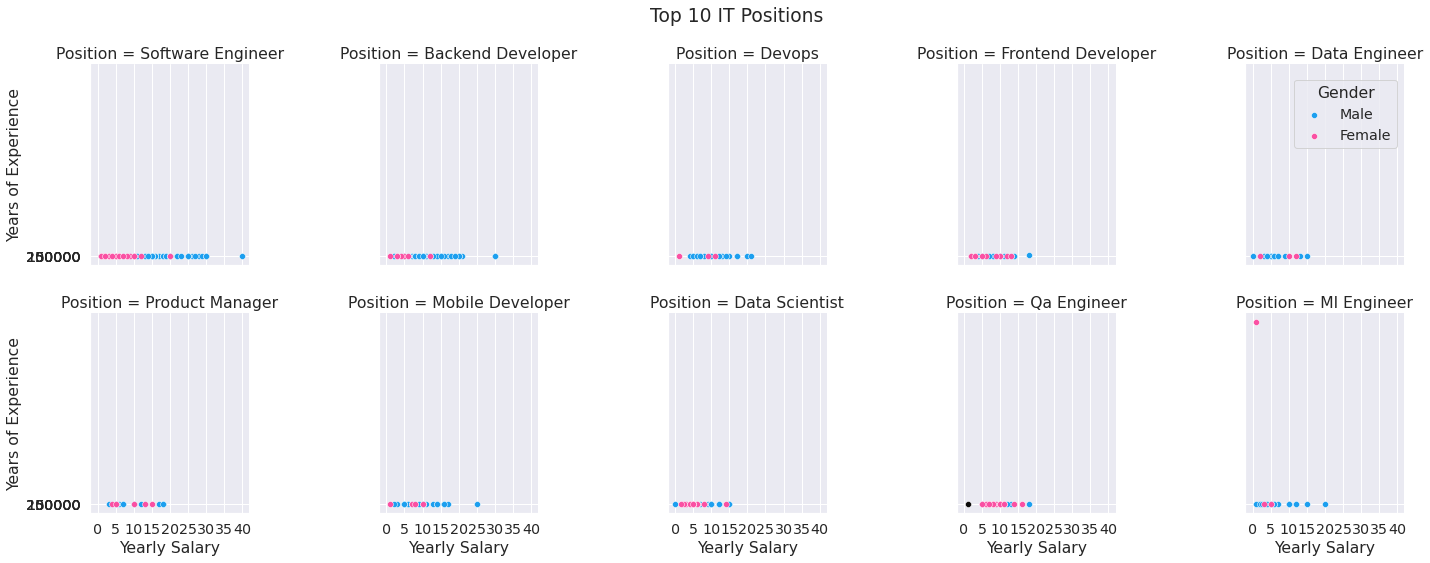

In [ ]:
g = sns.FacetGrid(rslt_df, col='Position', hue='Gender',palette=["#1C9FEF", "#FA50A3", "#0C0B0B"],col_wrap=5,)
g=g.map(sns.scatterplot,'Years_of_experience',"Yearly_salary")
g.set(xticks=[0,5, 10,15,20,25,30,35,40], yticks=[50000, 100000, 150000,200000,250000],xlabel='Yearly Salary', ylabel='Years of Experience')
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.suptitle('Top 10 IT Positions',y=1.02)
plt.legend (loc='upper right',title='Gender',bbox_to_anchor=(1,2.2))

plt.show()

### **Languages used by participants**

In [ ]:
language=survey_2020_filtered.Language.value_counts()
print('Percentage of Participants Spoken Language')
x=(language/language.sum())*100
round(x,2)


Percentage of Participants Spoken Language


English     81.03
German      16.57
Russian      1.08
Multiple     0.36
Italian      0.36
Czech        0.24
Spanish      0.24
Polish       0.12
Name: Language, dtype: float64

### **Most Used Program Languages**

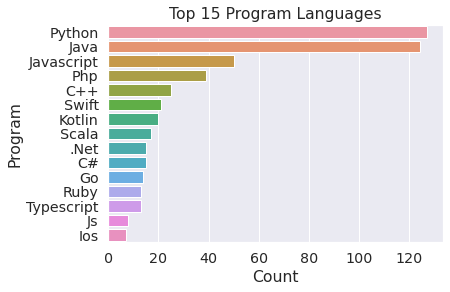

In [ ]:
program=rslt_df["Tech_program_language"].value_counts().iloc[:15].reset_index()
program=program.rename(columns={"index": "Program", "Tech_program_language": "Count"})
sns.barplot(data=program, y="Program", x="Count")
plt.title('Top 15 Program Languages')
plt.show()


## **Summary**


*   There were 830 participants reviewed in this analysis. The age distribution is left skewed with the majority of participants between 29 and 36. Most participants are from Munich and Berlin due to the survey placing a special focus on German IT specialists. Even though most employees are located in Germany the lanuage most often used at work is Enligsh (81%), and then German (17%), with the last 2% other or multiple languages.

*   There is positive, weak correlation between salary and years of experience. Only one female participant made over $100,000.


*   The top 10 most popular positions in this data set were Software Engineer, Backend Developer, Devops, Frontend Developer, Data Engineer, Product Manager, Moblie Developer, Data Scientist, QA Engineer, and MI Engineer. The majority of these positions had a salary range from $50,000-\$100,000.

*   Python annd Java were by far the most popular programming languages. Which are often used for software engineering a field 268 of the participants worked in.





